In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("visualization_data.csv")
df.head()

,name,status,year,price_num,currency,location,code,car_type,color,transmission,seats,mileage,desc,seller,address,phone,img,fuel_type,engine_capacity
0,Volkswagen Tiguan Allspace - 2023,Mới,2023,1.085790,VND,TP HCM,6356123,Xe nhập khẩu,Xám,số tự động,7,0.061755,"Xe nhập khẩu, màu xám, máy xăng 2.0 L, số tự đ...",Volkswagen Bình Dương,"7A/12A Đại lộ Bình Dương, Phường Bình Hoà TP HCM",0944329148,https://s.bonbanh.com/uploads/users/206217/car...,xăng,2.0
1,Toyota Fortuner Legender 2.4L 4x2 AT - 2025,Mới,2025,0.320508,VND,Hà Nội,6255222,Xe lắp ráp trong nước,Trắng,số tự động,7,0.061755,"Xe lắp ráp trong nước, màu trắng, máy dầu 2.4 ...",Toyota Hoàn Kiếm,"Số 94 Ngô Thì Nhậm ,Phường Phạm Đình Hổ, Quận ...",0833659659,https://s.bonbanh.com/uploads/users/54679/car/...,dầu,2.4
2,Subaru Forester 2.0i-L - 2024,Mới,2024,-0.205825,VND,TP HCM,6184187,Xe nhập khẩu,Trắng,số tự động,5,0.061755,"Xe nhập khẩu, màu trắng, máy xăng 2.0 L, số tự...",Subaru Gia Định - Thủ Đức,"01-03 Lê Văn Chí, Phường Linh Chiểu, TP Thủ Đứ...",0979753204,https://s.bonbanh.com/uploads/users/455246/car...,xăng,2.0
3,Mitsubishi Triton Athlete 4WD AT - 2025,Mới,2025,-0.094424,VND,TP HCM,6089369,Xe nhập khẩu,Trắng,số tự động,5,0.061755,"Xe nhập khẩu, màu trắng, máy dầu 2.4 L, số tự ...",Mitsubishi Isamco - Trần ...,"262 Trần Hưng đạo, Phường Cầu Ông Lãnh TP HCM",0934805435,https://s.bonbanh.com/uploads/users/113800/car...,dầu,2.4
4,VinFast VF5 S - 2024,Mới,2024,-0.803198,VND,Hà Nội,5931494,Xe lắp ráp trong nước,Đỏ,số tự động,5,0.061755,"Xe lắp ráp trong nước, màu đỏ, xe điện , số tự...",Vinfast Hoàng Mai,"Tòa nhà Red River Building, Gamuda Garden, Hoà...",0925589999,https://s.bonbanh.com/uploads/users/794308/car...,xăng,2.0


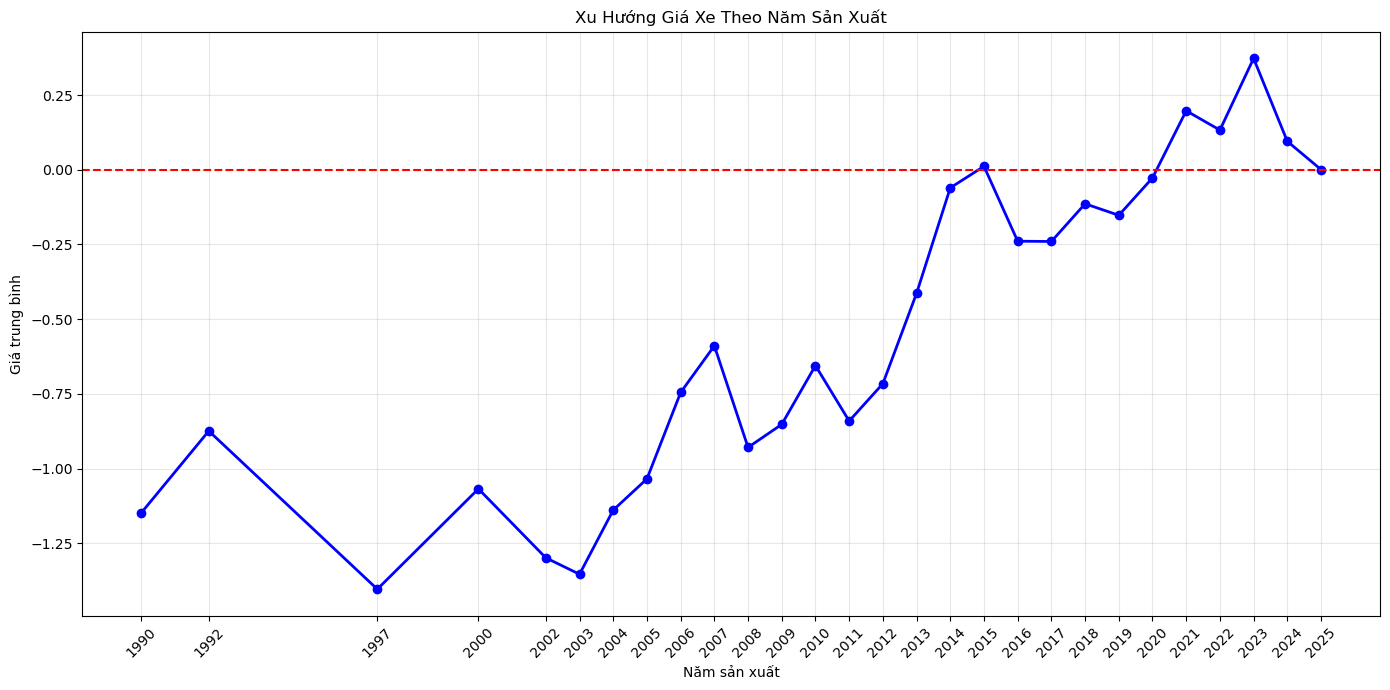

In [3]:
# Trung bình giá theo năm sản xuất
year_price = df.groupby('year')['price_num'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(year_price['year'], year_price['price_num'], 
         marker='o', color='blue', linewidth=2, markersize=6)
plt.title('Xu Hướng Giá Xe Theo Năm Sản Xuất')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá trung bình')
plt.grid(True, alpha=0.3)
plt.xticks(year_price['year'], rotation=45)
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

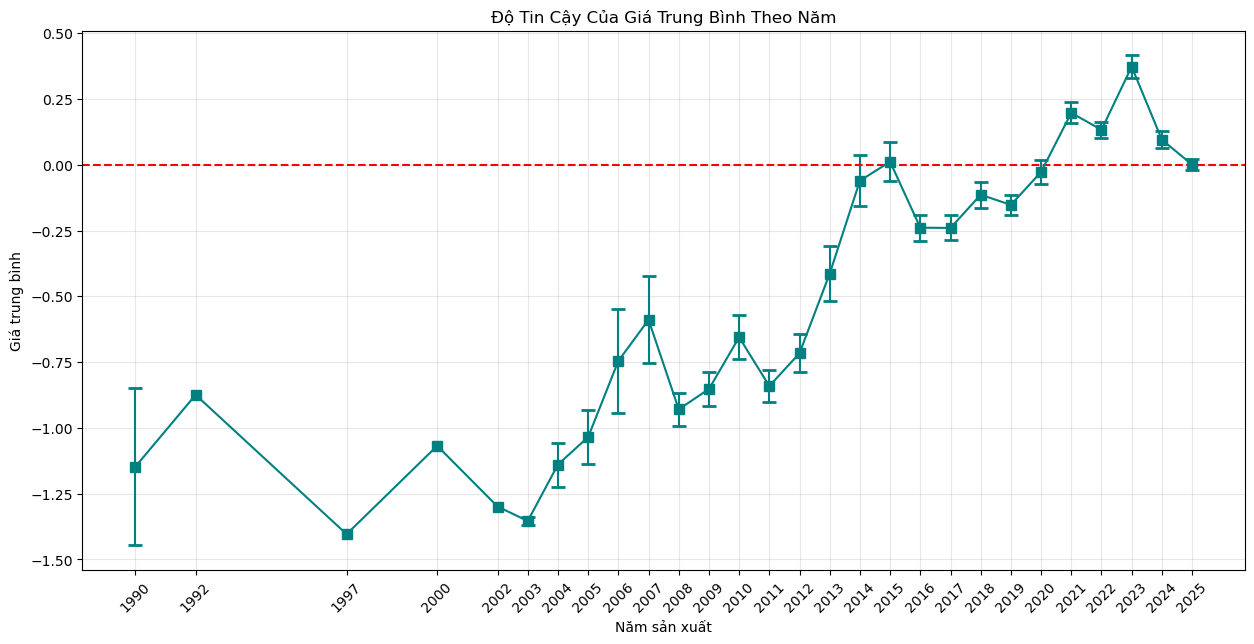

In [4]:
# Độ tin cậy của giá trung bình theo năm
year_stats = df.groupby('year')['price_num'].agg(['mean', 'std', 'count'])
year_stats['sem'] = year_stats['std'] / np.sqrt(year_stats['count'])

plt.figure(figsize=(15,7))
plt.errorbar(year_stats.index, year_stats['mean'], yerr=year_stats['sem'],
             fmt='s-', capsize=5, capthick=2, color='teal', markersize=7)
plt.title('Độ Tin Cậy Của Giá Trung Bình Theo Năm')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá trung bình')
plt.grid(True, alpha=0.3)
plt.xticks(year_stats.index, rotation=45)
plt.axhline(0, color='red', linestyle='--')
plt.show()

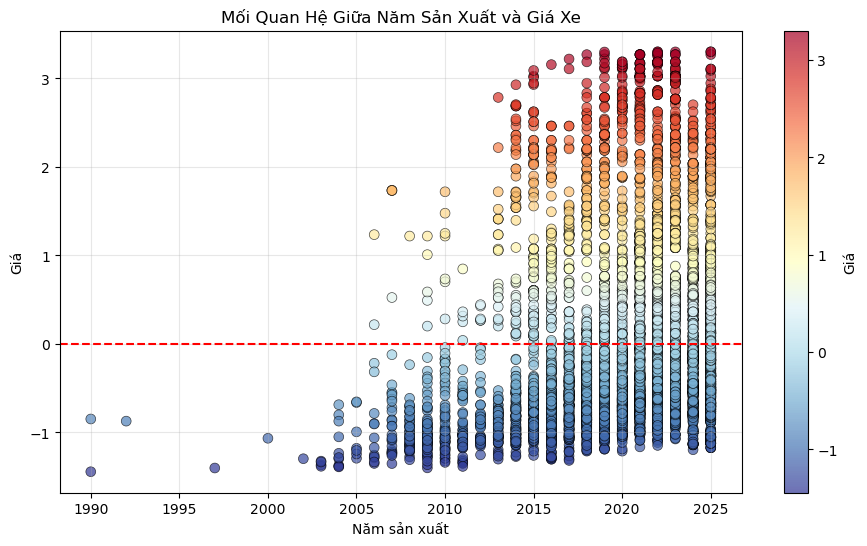

In [5]:
# Mối quan hệ giữa năm sản xuất và giá
plt.figure(figsize=(11,6))
scatter = plt.scatter(df['year'], df['price_num'], 
                     c=df['price_num'], cmap='RdYlBu_r', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Giá')
plt.title('Mối Quan Hệ Giữa Năm Sản Xuất và Giá Xe')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.show()


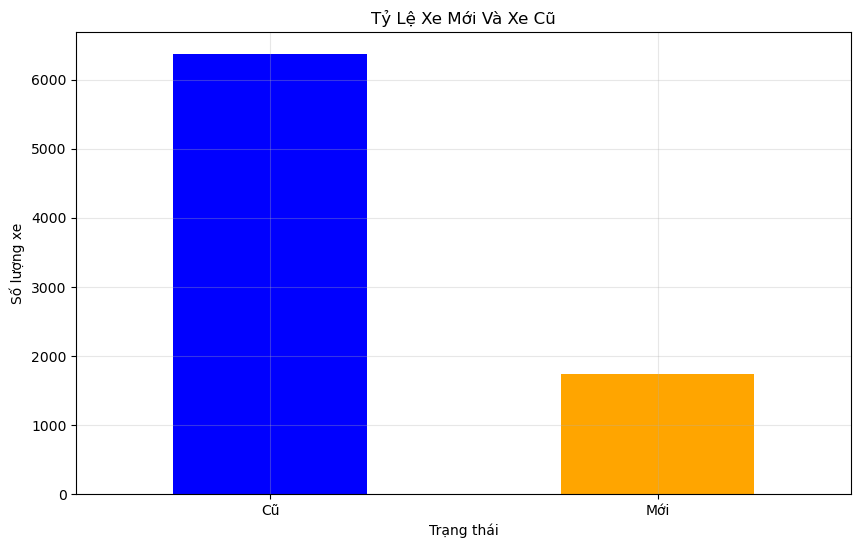

In [6]:
plt.figure(figsize=(10, 6))

df['status'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Tỷ Lệ Xe Mới Và Xe Cũ')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng xe')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.show()

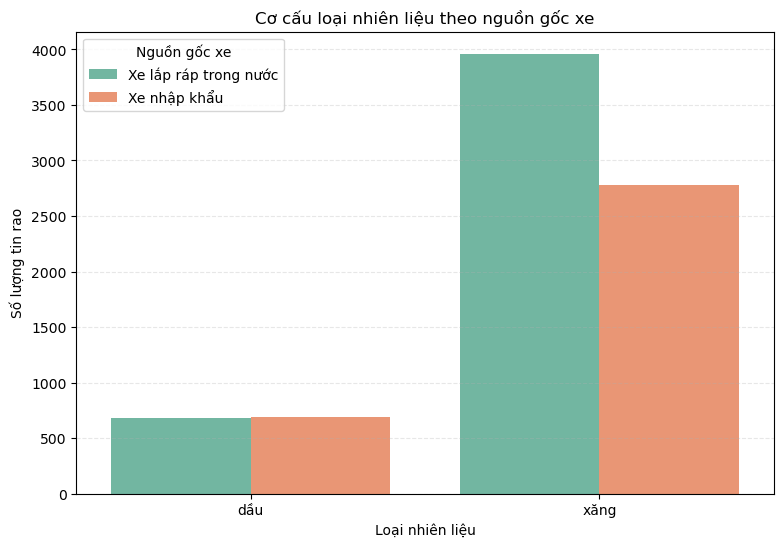

In [7]:
fuel_car_counts = df.groupby(['car_type', 'fuel_type']).size().reset_index(name='count')

plt.figure(figsize=(9,6))
sns.barplot(
    data=fuel_car_counts,
    x='fuel_type',
    y='count',
    hue='car_type',
    palette='Set2'
)

plt.title('Cơ cấu loại nhiên liệu theo nguồn gốc xe')
plt.xlabel('Loại nhiên liệu')
plt.ylabel('Số lượng tin rao')
plt.legend(title='Nguồn gốc xe')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


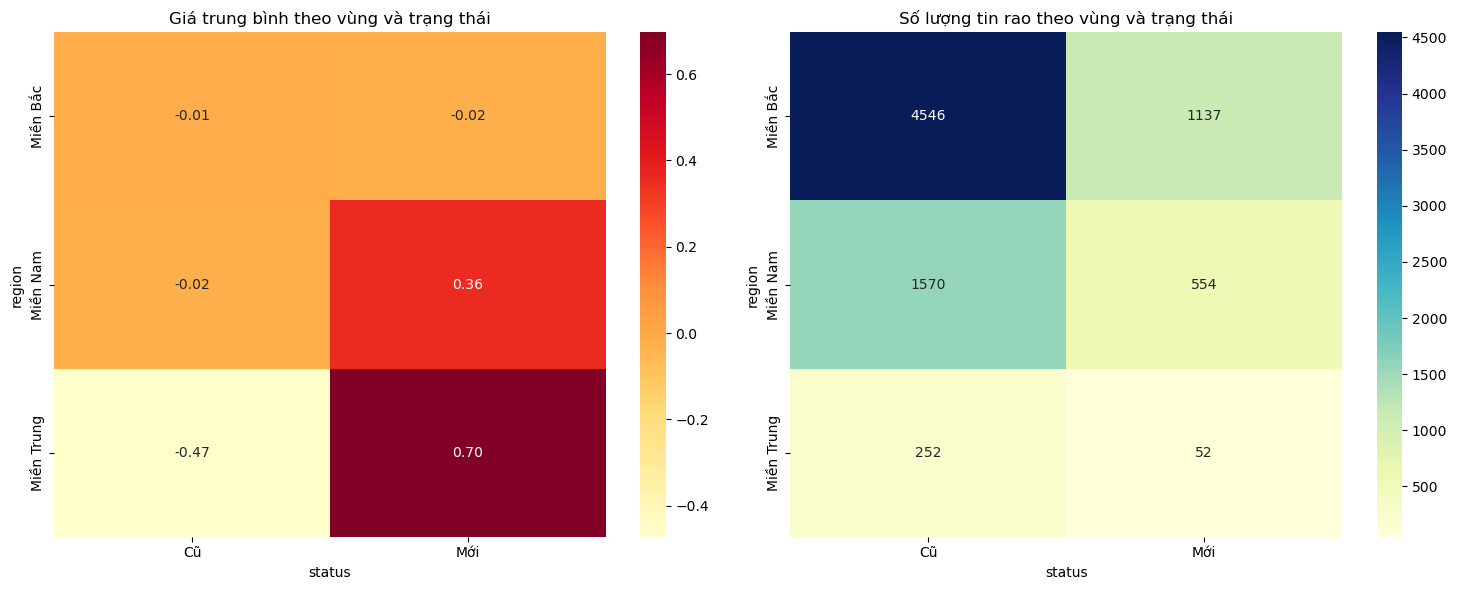

In [8]:
# Định nghĩa vùng miền (3 miền)
region_mapping = {
    # Miền Bắc (25 tỉnh/thành)
    'Hà Nội': 'Miền Bắc',
    'Hải Phòng': 'Miền Bắc', 
    'Hà Giang': 'Miền Bắc',
    'Cao Bằng': 'Miền Bắc',
    'Lào Cai': 'Miền Bắc',
    'Bắc Kạn': 'Miền Bắc',
    'Lạng Sơn': 'Miền Bắc',
    'Tuyên Quang': 'Miền Bắc',
    'Yên Bái': 'Miền Bắc',
    'Thái Nguyên': 'Miền Bắc',
    'Phú Thọ': 'Miền Bắc',
    'Vĩnh Phúc': 'Miền Bắc',
    'Bắc Giang': 'Miền Bắc',
    'Bắc Ninh': 'Miền Bắc',
    'Quảng Ninh': 'Miền Bắc',
    'Lai Châu': 'Miền Bắc',
    'Điện Biên': 'Miền Bắc',
    'Sơn La': 'Miền Bắc',
    'Hòa Bình': 'Miền Bắc',
    'Hải Dương': 'Miền Bắc',
    'Hưng Yên': 'Miền Bắc',
    'Thái Bình': 'Miền Bắc',
    'Hà Nam': 'Miền Bắc',
    'Nam Định': 'Miền Bắc',
    'Ninh Bình': 'Miền Bắc',

    # Miền Trung (19 tỉnh/thành)
    'Thanh Hóa': 'Miền Trung',
    'Nghệ An': 'Miền Trung',
    'Hà Tĩnh': 'Miền Trung',
    'Quảng Bình': 'Miền Trung',
    'Quảng Trị': 'Miền Trung',
    'Thừa Thiên Huế': 'Miền Trung',
    'Đà Nẵng': 'Miền Trung',
    'Quảng Nam': 'Miền Trung',
    'Quảng Ngãi': 'Miền Trung',
    'Bình Định': 'Miền Trung',
    'Phú Yên': 'Miền Trung',
    'Khánh Hòa': 'Miền Trung',
    'Ninh Thuận': 'Miền Trung',
    'Bình Thuận': 'Miền Trung',
    'Kon Tum': 'Miền Trung',
    'Gia Lai': 'Miền Trung',
    'Đăk Lăk': 'Miền Trung',
    'Đắk Nông': 'Miền Trung',
    'Lâm Đồng': 'Miền Trung',

    # Miền Nam (19 tỉnh/thành)
    'TP HCM': 'Miền Nam',
    'Bà Rịa Vũng Tàu': 'Miền Nam',
    'Bình Dương': 'Miền Nam',
    'Bình Phước': 'Miền Nam',
    'Đồng Nai': 'Miền Nam',
    'Tây Ninh': 'Miền Nam',
    'An Giang': 'Miền Nam',
    'Bến Tre': 'Miền Nam',
    'Bạc Liêu': 'Miền Nam',
    'Cà Mau': 'Miền Nam',
    'Cần Thơ': 'Miền Nam',
    'Đồng Tháp': 'Miền Nam',
    'Hậu Giang': 'Miền Nam',
    'Kiên Giang': 'Miền Nam',
    'Long An': 'Miền Nam',
    'Sóc Trăng': 'Miền Nam',
    'Tiền Giang': 'Miền Nam',
    'Trà Vinh': 'Miền Nam',
    'Vĩnh Long': 'Miền Nam'
}


# Map regions và tạo bản đồ nhiệt
df['region'] = df['location'].map(region_mapping)

# Tạo pivot table với các metrics chính
region_pivot = pd.pivot_table(
    df,
    values=['price_num', 'year', 'mileage'],
    index='region',
    columns='status',
    aggfunc={
        'price_num': ['mean', 'count', 'std'],
        'year': 'mean',
        'mileage': 'mean'
    },
    fill_value=0
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Giá trung bình theo vùng và trạng thái
sns.heatmap(region_pivot['price_num']['mean'], 
            annot=True, fmt='.2f', cmap='YlOrRd', ax=ax1)
ax1.set_title('Giá trung bình theo vùng và trạng thái')

# 2. Số lượng tin rao theo vùng và trạng thái
sns.heatmap(region_pivot['price_num']['count'],
            annot=True, fmt='.0f', cmap='YlGnBu', ax=ax2)
ax2.set_title('Số lượng tin rao theo vùng và trạng thái')

plt.tight_layout()
plt.show()



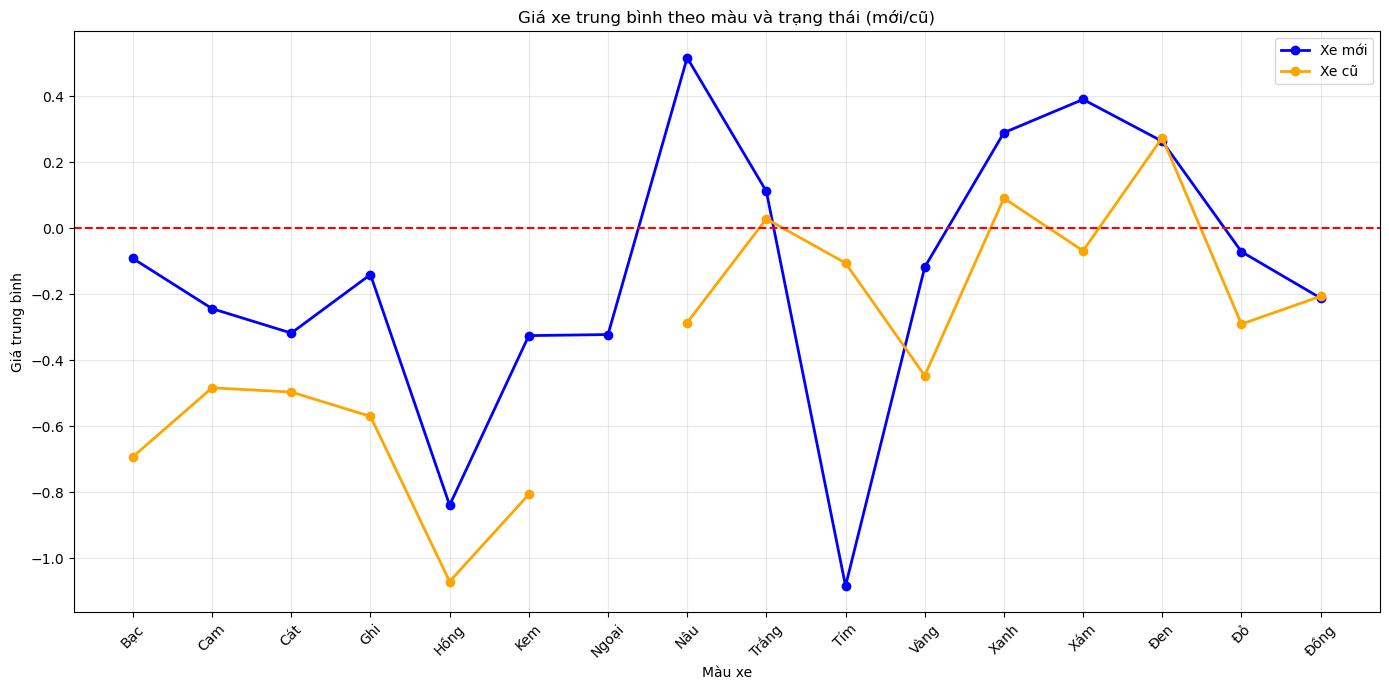

In [9]:

# Gom nhóm và tính giá trung bình
color_status_price = df.groupby(['color', 'status'])['price_num'].mean().reset_index()

new_cars = color_status_price[color_status_price['status'].str.lower() == 'mới']
used_cars = color_status_price[color_status_price['status'].str.lower() == 'cũ']

# Sắp xếp màu để 2 đường cùng thứ tự
all_colors = sorted(df['color'].unique(), key=lambda x: str(x))

plt.figure(figsize=(14, 7))

plt.plot(all_colors, 
         [new_cars[new_cars['color'] == c]['price_num'].values[0] if c in list(new_cars['color']) else None for c in all_colors],
         marker='o', color='blue', label='Xe mới', linewidth=2)

plt.plot(all_colors, 
         [used_cars[used_cars['color'] == c]['price_num'].values[0] if c in list(used_cars['color']) else None for c in all_colors],
         marker='o', color='orange', label='Xe cũ', linewidth=2)

plt.title('Giá xe trung bình theo màu và trạng thái (mới/cũ)')
plt.xlabel('Màu xe')
plt.ylabel('Giá trung bình')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


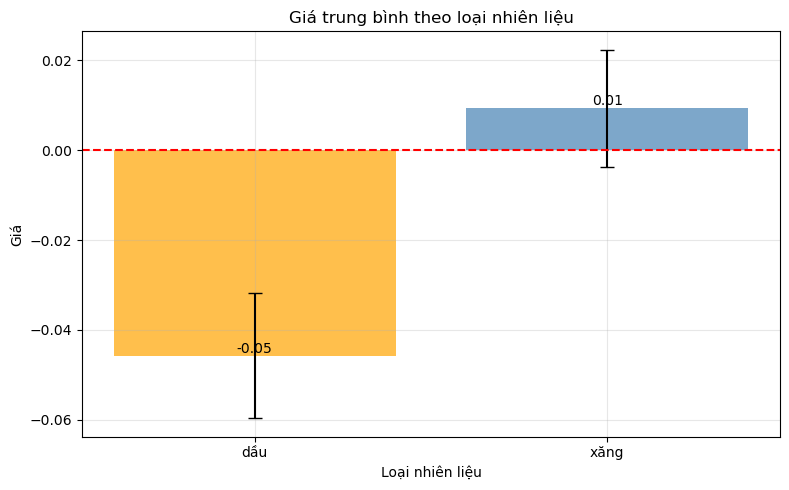

In [10]:
# Tính giá trung bình theo nhiên liệu
fuel_price = df.groupby('fuel_type')['price_num'].agg(['mean', 'std', 'count']).reset_index()
fuel_price['sem'] = fuel_price['std'] / np.sqrt(fuel_price['count'])

plt.figure(figsize=(8, 5))
bars = plt.bar(fuel_price['fuel_type'], fuel_price['mean'], 
               yerr=fuel_price['sem'],
               capsize=5,
               color=['orange', 'steelblue', 'green'],
               alpha=0.7)

# Thêm giá trị lên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title("Giá trung bình theo loại nhiên liệu")
plt.xlabel("Loại nhiên liệu")
plt.ylabel("Giá")
plt.grid(True, alpha=0.3)

# baseline 0
plt.axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

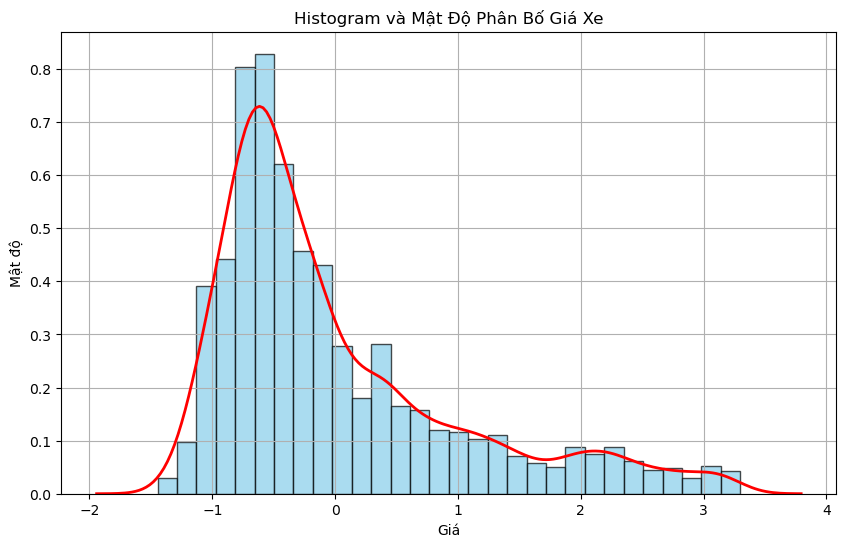

In [11]:
# Histogram và Mật Độ Phân Bố Giá Xe
plt.figure(figsize=(10, 6))
plt.hist(df['price_num'], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
sns.kdeplot(df['price_num'], color='red', linewidth=2)  # Density plot
plt.title('Histogram và Mật Độ Phân Bố Giá Xe')
plt.xlabel('Giá')
plt.ylabel('Mật độ')
plt.grid(True)
plt.show()

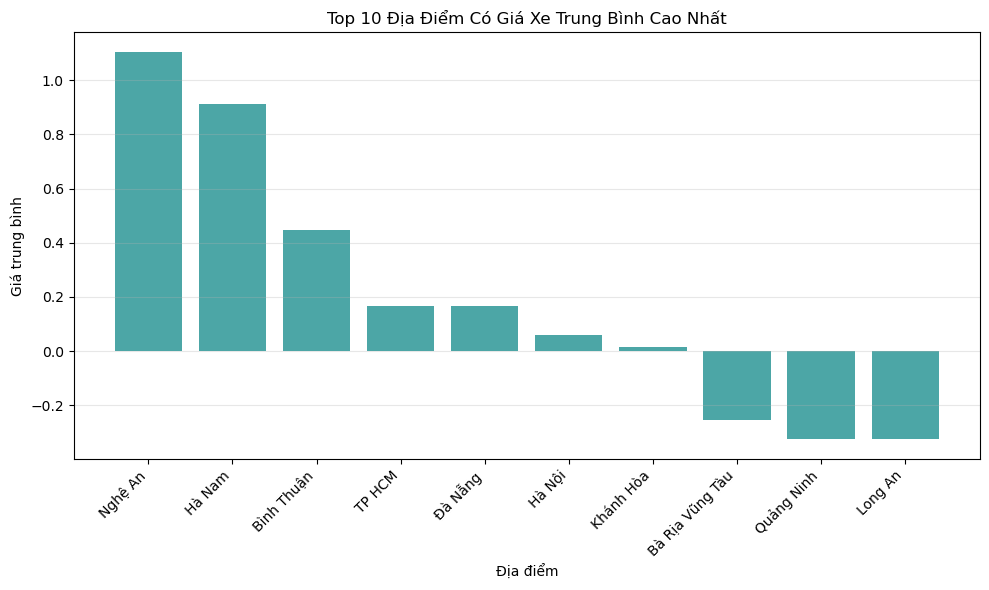

In [12]:
plt.figure(figsize=(10, 6))
loc_price = df.groupby("location")["price_num"].agg(['mean', 'std', 'count']).reset_index()
top_10_loc = loc_price.nlargest(10, 'mean')

bars = plt.bar(range(len(top_10_loc)), top_10_loc['mean'], 
               color='teal',
               alpha=0.7)

plt.title("Top 10 Địa Điểm Có Giá Xe Trung Bình Cao Nhất")
plt.ylabel("Giá trung bình")
plt.xlabel("Địa điểm")
plt.xticks(range(len(top_10_loc)), top_10_loc['location'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

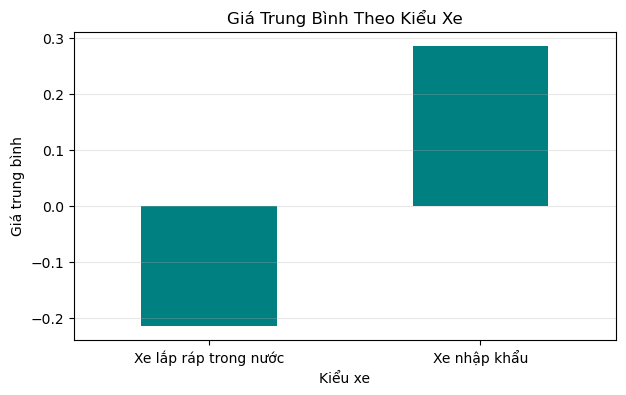

In [13]:
plt.figure(figsize=(7,4))
df.groupby('car_type')['price_num'].mean().plot(kind='bar', color='teal')
plt.title("Giá Trung Bình Theo Kiểu Xe")
plt.xlabel("Kiểu xe")
plt.ylabel("Giá trung bình")
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.show()

In [14]:
# high_seats = df[df['seats'] >=30][['name', 'seats', 'price_num']]
# high_seats

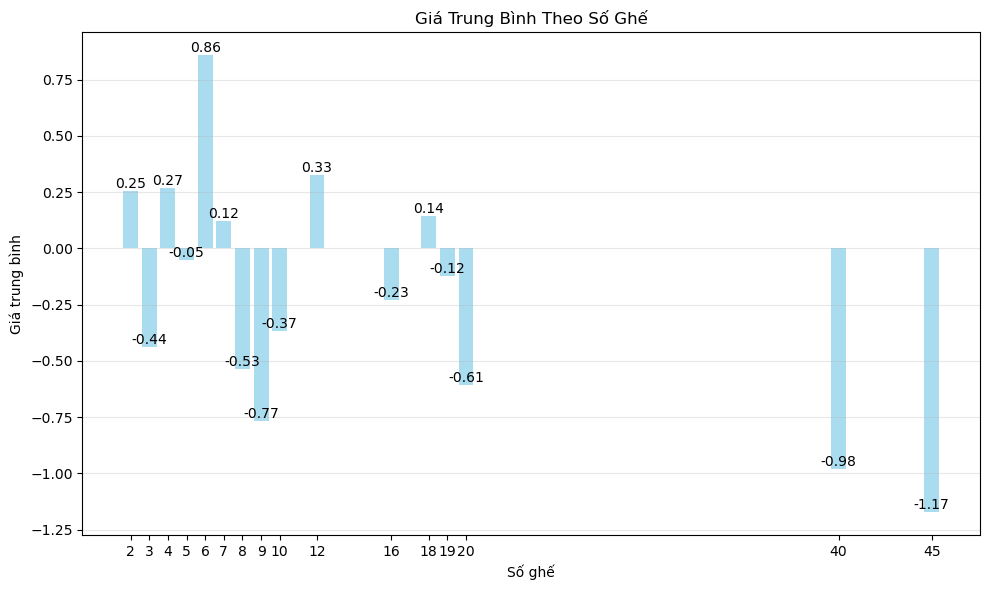

In [15]:
plt.figure(figsize=(10, 6))

seat_stats = df.groupby('seats')['price_num'].mean().reset_index()
bars = plt.bar(seat_stats['seats'], seat_stats['price_num'], 
               color='skyblue',
               alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', 
             ha='center', va='bottom')

plt.title('Giá Trung Bình Theo Số Ghế')
plt.xlabel('Số ghế')
plt.ylabel('Giá trung bình')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(seat_stats['seats'], seat_stats['seats'])
plt.tight_layout()
plt.show()

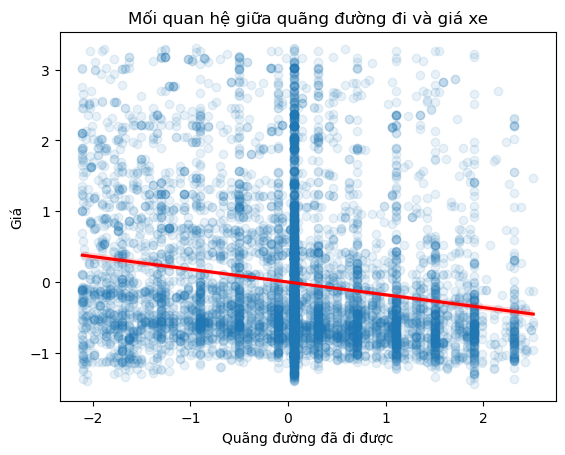

In [16]:
sns.regplot(x='mileage', y='price_num', data=df, scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title("Mối quan hệ giữa quãng đường đi và giá xe")
plt.xlabel("Quãng đường đã đi được")
plt.ylabel("Giá")
plt.show()

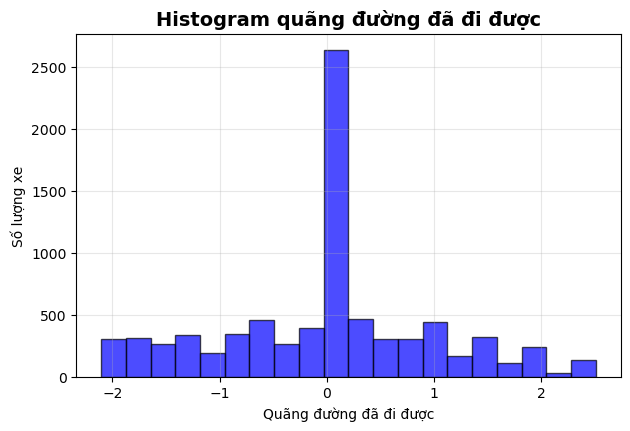

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['mileage'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram quãng đường đã đi được', fontweight='bold', fontsize=14)
plt.xlabel('Quãng đường đã đi được')
plt.ylabel('Số lượng xe')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

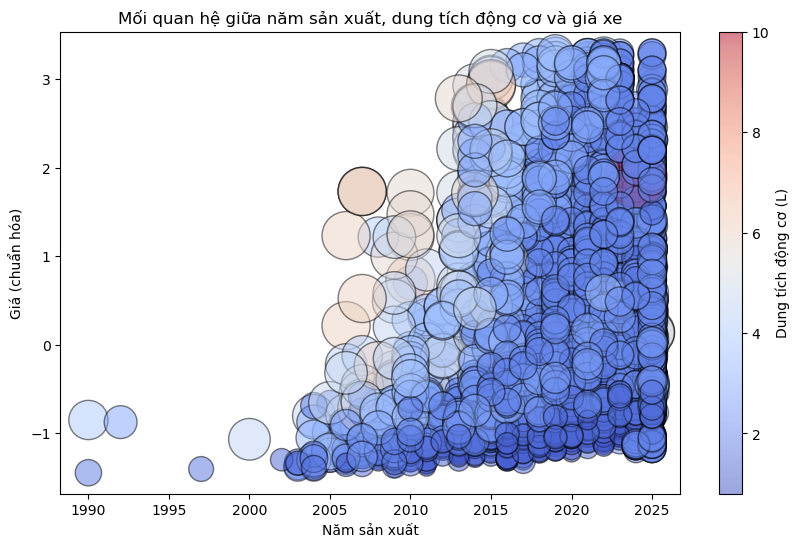

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df['year'], df['price_num'], 
            s=df['engine_capacity']*200, 
            alpha=0.5, c=df['engine_capacity'], 
            cmap='coolwarm', 
            edgecolor='black')
plt.title("Mối quan hệ giữa năm sản xuất, dung tích động cơ và giá xe")
plt.xlabel("Năm sản xuất")
plt.ylabel("Giá (chuẩn hóa)")
plt.colorbar(label="Dung tích động cơ (L)")
plt.show()

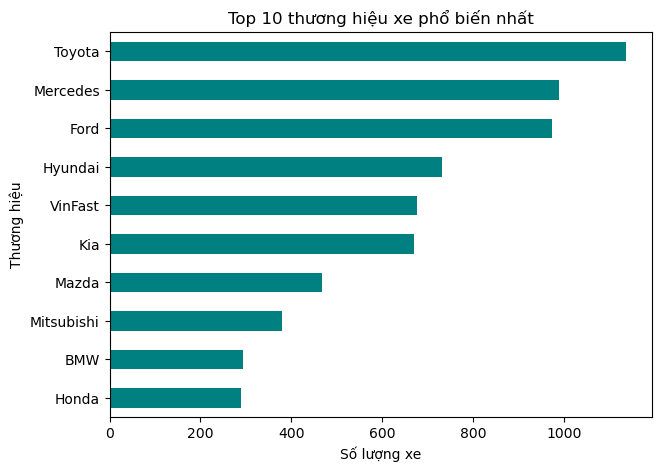

In [19]:
top_brands = df['name'].str.split().str[0].value_counts().head(10)
top_brands.plot(kind='barh', color='teal', figsize=(7,5))
plt.title("Top 10 thương hiệu xe phổ biến nhất")
plt.xlabel("Số lượng xe")
plt.ylabel("Thương hiệu")
plt.gca().invert_yaxis()
plt.show()

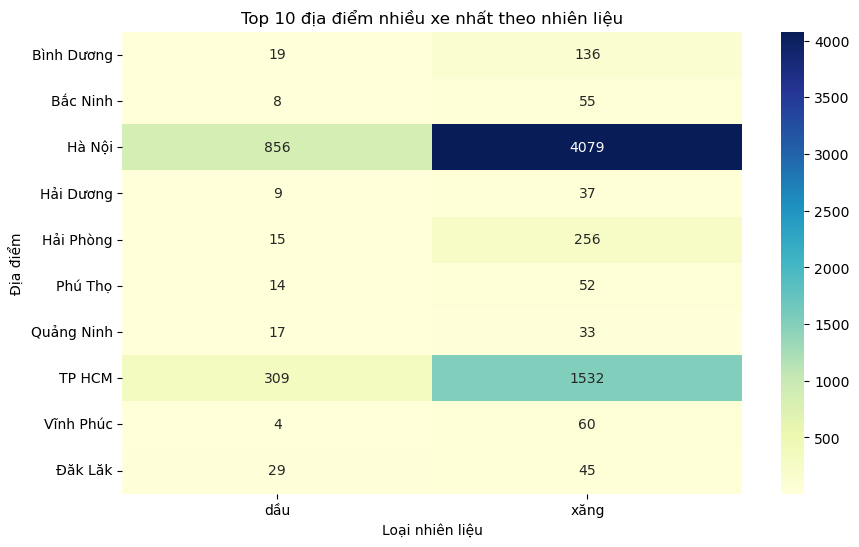

In [20]:
top_locs = df['location'].value_counts().head(10).index
pivot = (df[df['location'].isin(top_locs)]
.pivot_table(index='location', columns='fuel_type', values='name', aggfunc='count', fill_value=0))
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 địa điểm nhiều xe nhất theo nhiên liệu')
plt.xlabel('Loại nhiên liệu')
plt.ylabel('Địa điểm')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13908\1932045381.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_counts.values, y=top10_counts.index, palette='viridis')


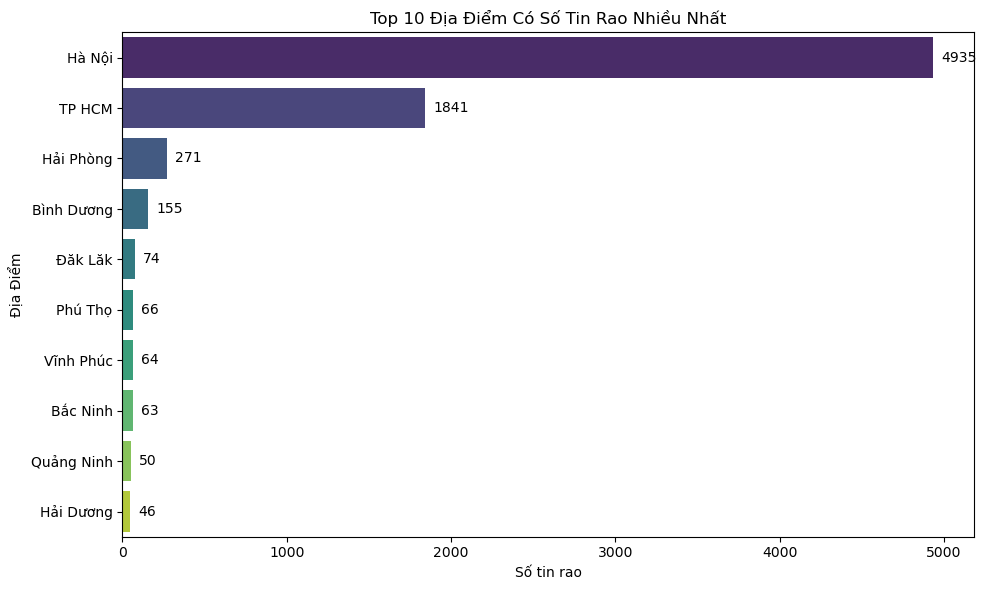

In [21]:
top10_counts = df['location'].fillna('Unknown').value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_counts.values, y=top10_counts.index, palette='viridis')
plt.title('Top 10 Địa Điểm Có Số Tin Rao Nhiều Nhất')
plt.xlabel('Số tin rao')
plt.ylabel('Địa Điểm')

for i, v in enumerate(top10_counts.values):
    plt.text(v + max(top10_counts.values) * 0.01, i, f'{v}', va='center')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13908\2355158139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='price_num',


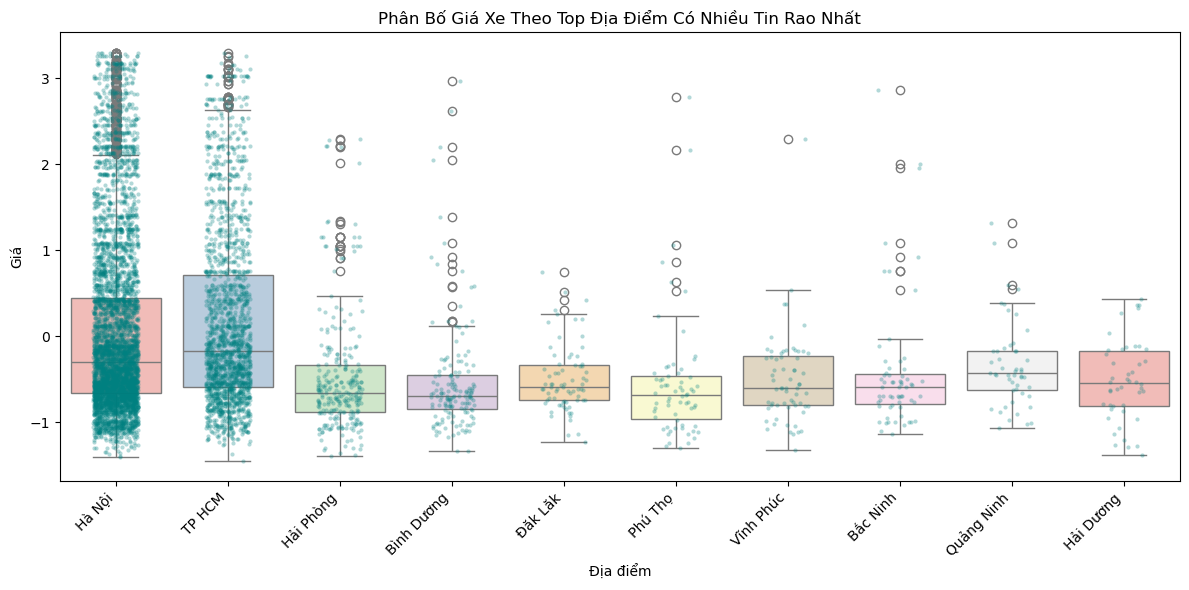

In [22]:
top10_locations = df['location'].value_counts().nlargest(10).index

plt.figure(figsize=(12,6))

sns.boxplot(x='location', y='price_num', 
            data=df[df['location'].isin(top10_locations)],
            order=top10_locations,
            palette='Pastel1')

sns.stripplot(x='location', y='price_num', 
              data=df[df['location'].isin(top10_locations)],
              order=top10_locations,
              color='teal', 
              size=3, 
              alpha=0.3, 
              jitter=0.2)

plt.title('Phân Bố Giá Xe Theo Top Địa Điểm Có Nhiều Tin Rao Nhất')
plt.xlabel('Địa điểm')
plt.ylabel('Giá')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

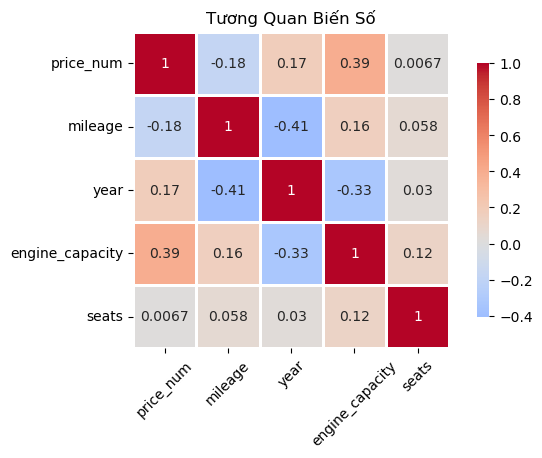

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
numeric_cols = ['price_num', 'mileage', 'year', 'engine_capacity', 'seats']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, 
            linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Tương Quan Biến Số')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()